In [372]:
# Reading Data
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import math

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs_dict = pickle.load(infile)

infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd_dict = pickle.load(infile)


# Lab 7

## Problem 1

Text(0, 0.5, 'Counts')

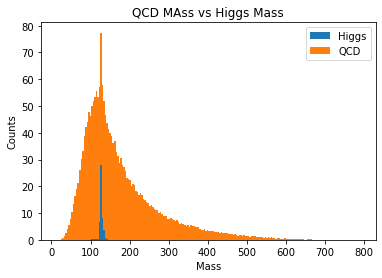

In [373]:
# Problem 1:

higgs_mass = higgs_dict['mass']
qcd_mass = qcd_dict['mass']

data = [higgs_mass, qcd_mass]
higgs_rescale_factor = 50 / 100000
qcd_rescale_factor = 2000 / 100000

higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_dict['mass']))
qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_dict['mass']))


heights, temp1, temp2 = plt.hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights], label=['Higgs', 'QCD'])
qcd_mean = sum(heights[1])
higgs_mean = sum(heights[0])
plt.title('QCD MAss vs Higgs Mass')
plt.legend()
plt.xlabel('Mass')
plt.ylabel('Counts')

The above plot shows a stacked histogram of the mass values in the QCD background, and the simulated higgs data.

In [374]:
# Calculate Significance

probability = stats.poisson.sf(qcd_mean, mu=qcd_mean - higgs_mean)
sigma = stats.norm.isf(probability)
print('Significance: ', str(sigma))

Significance:  1.1060461130668817


In [375]:
expected_sigma = 50 / math.sqrt(2000)
print(expected_sigma)

1.118033988749895


Problem 1.1

The calculated and expected significance for the data are equivalent. This makes sense because the data is simulated to contain these numbers of higgs values in both the higgs data, and QCD data. So calculating the significance results in a value near the theoretical expected value, with some slight variation due to the data being simulated.

## Problem 2

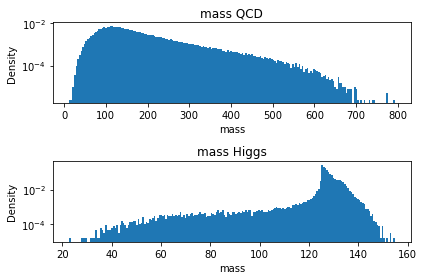

In [376]:
# Problem 2

fig, ax = plt.subplots(2)
ax[0].hist(qcd_dict['mass'], bins=200, density=True)
ax[1].hist(higgs_dict['mass'], bins=200, density=True)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_title('mass QCD')
ax[1].set_title('mass Higgs')
ax[0].set_xlabel('mass')
ax[0].set_ylabel('Density')
ax[1].set_xlabel('mass')
ax[1].set_ylabel('Density')
plt.tight_layout()

From this plot, we can see that the higgs data lies solely between a subset of the QCD data. To start off I will make an intitial cut of the QCD data, to be between 20, and 160, as including ranges outside of this in future cuts, won't contain any of the expected higgs data, and not increase significance by as much.

Text(0, 0.5, 'Counts')

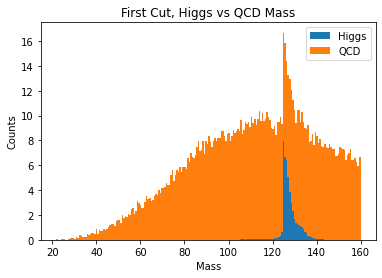

In [377]:
qcd_initial_cut = [i for i in qcd_mass if i > 20 and i < 160]
qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_initial_cut))
data = [higgs_mass, qcd_initial_cut]
heights, temp1, temp2 = plt.hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights], label=['Higgs', 'QCD'])
plt.title('First Cut, Higgs vs QCD Mass')
plt.legend()
plt.xlabel('Mass')
plt.ylabel('Counts')

In [378]:
mean_higgs = sum(heights[0])
mean_qcd = sum(heights[1])
probability = stats.poisson.sf(mean_qcd, mu=mean_qcd - mean_higgs)
sigma = stats.norm.isf(probability)
print('Significance: ', str(sigma))

Significance:  1.4988636517683895


The next cut I will be mass values between 120, and 140. This will still preserve the majority of higgs events, as that is where they lie. It will also serve to cut down a significant amount of the background.

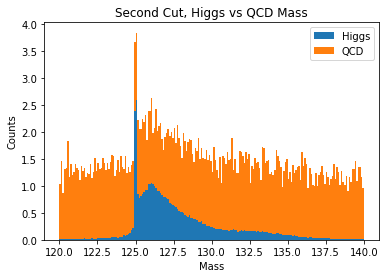

In [379]:
qcd_second_cut = [i for i in qcd_mass if i > 120 and i < 140]
higgs_cut = [i for i in higgs_mass if i > 120 and i < 140]
qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_second_cut))
higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_cut))
data = [higgs_cut, qcd_second_cut]
heights, temp1, temp2 = plt.hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights], label=['Higgs', 'QCD'])
plt.title('Second Cut, Higgs vs QCD Mass')
plt.xlabel('Mass')
plt.ylabel('Counts')
plt.legend()

In [380]:
mean_higgs = sum(heights[0])
mean_qcd = sum(heights[1])
probability = stats.poisson.sf(mean_qcd, mu=mean_qcd - mean_higgs)
sigma = stats.norm.isf(probability)
print('Significance: ', str(sigma))

Significance:  2.90654815722082


The next cut I will make, is cut values below 125, this will remove the tail from the higgs data while preserving the spike. It will also remove more of the background. Then I will make cuts decreasing the maximum mass in the cut by 1, and choose the cut that contains the highest significance.

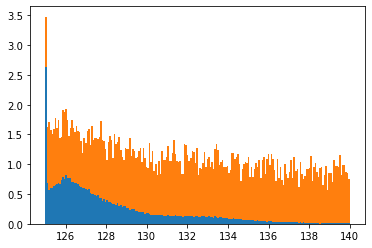

In [381]:
qcd_third_cut = [i for i in qcd_mass if i > 125 and i < 140]
higgs_second_cut = [i for i in higgs_mass if i > 125 and i < 140]
qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_third_cut))
higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_second_cut))
data = [higgs_second_cut, qcd_third_cut]
heights, temp1, temp2 = plt.hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights])

In [382]:
mean_higgs = sum(heights[0])
mean_qcd = sum(heights[1])
probability = stats.poisson.sf(mean_qcd, mu=mean_qcd - mean_higgs)
sigma = stats.norm.isf(probability)
print('Significance: ', str(sigma))

Significance:  3.055937423126392


In [383]:
for i in range(1, 15):
    qcd_cut = [j for j in qcd_mass if j > 125 and j < (140 - i)]
    higgs_cut = [j for j in higgs_mass if j > 125 and j < (140 - i)]
    qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_cut))
    higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_cut))
    qcd_heights, temp1 = np.histogram(qcd_cut, 200, weights=qcd_weights)
    higgs_heights, temp2 = np.histogram(higgs_cut, 200, weights=higgs_weights)
    mean_qcd = sum(qcd_heights)
    mean_higgs = sum(higgs_heights)
    probability = stats.poisson.sf(mean_qcd, mu=mean_qcd - mean_higgs)
    sigma = stats.norm.isf(probability)
    print('Significance: ', str(sigma), ' min mass: ', str(125), ' max mass: ', str(140 - i), ' Higgs Expected Yield: ', str(mean_higgs), ' QCD Expected Yield: ', str(mean_qcd - mean_higgs))

Significance:  3.6315988480985717  min mass:  125  max mass:  139  Higgs Expected Yield:  43.31299999999981  QCD Expected Yield:  130.10700000000028
Significance:  3.796047147378383  min mass:  125  max mass:  138  Higgs Expected Yield:  43.12149999999986  QCD Expected Yield:  118.9385000000002
Significance:  3.8989845321000023  min mass:  125  max mass:  137  Higgs Expected Yield:  42.81649999999986  QCD Expected Yield:  107.74350000000031
Significance:  4.0192290452012065  min mass:  125  max mass:  136  Higgs Expected Yield:  42.369499999999896  QCD Expected Yield:  96.57050000000024
Significance:  4.193574353075133  min mass:  125  max mass:  135  Higgs Expected Yield:  41.670499999999905  QCD Expected Yield:  85.14950000000019
Significance:  4.434676563634159  min mass:  125  max mass:  134  Higgs Expected Yield:  40.63449999999986  QCD Expected Yield:  73.50550000000021
Significance:  4.575626114181664  min mass:  125  max mass:  133  Higgs Expected Yield:  39.179999999999914  QC

The mass cuts with maximum significance values were small, and only reached up to 6.6 sigma. Due to the cuts being small, many of the higgs events were lost in the data, in order to preserve more higgs events, I will want to keep at least 30 in the higgs data set.

## Problem 3

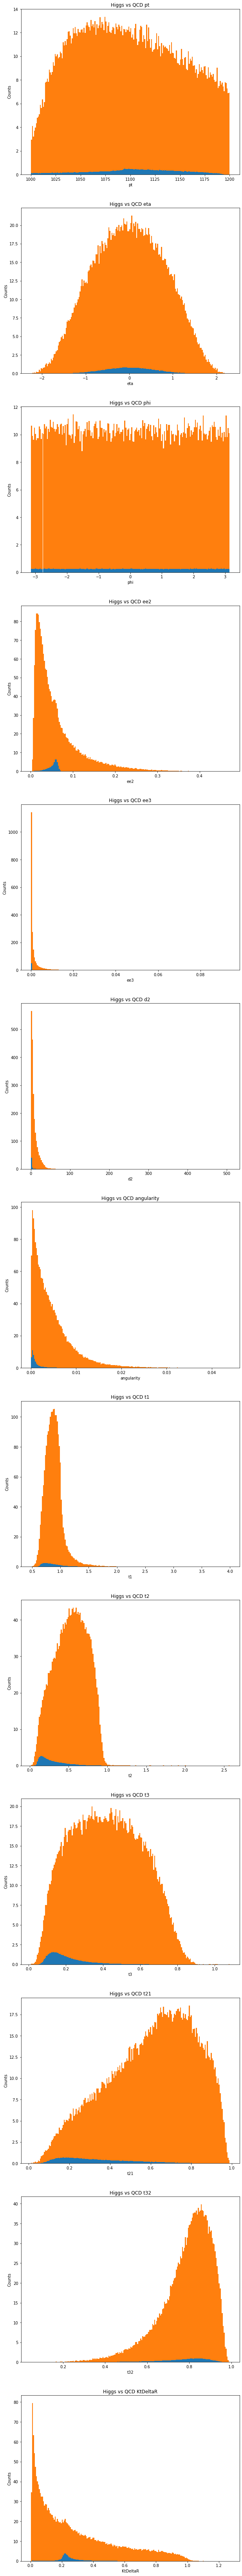

In [384]:
# Problem 3.A
fig, ax = plt.subplots(13, figsize=(10,120))
count = 0
for var in qcd_dict:
    if var != 'mass':
        higgs = higgs_dict[var]
        qcd = qcd_dict[var]

        data = [higgs, qcd]
        higgs_rescale_factor = 50 / 100000
        qcd_rescale_factor = 2000 / 100000

        higgs_weights = np.repeat(higgs_rescale_factor, len(higgs))
        qcd_weights = np.repeat(qcd_rescale_factor, len(qcd))


        heights, temp1, temp2 = ax[count].hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights])
        ax[count].set_xlabel(var)
        ax[count].set_ylabel('Counts')
        ax[count].set_title(f'Higgs vs QCD {var}')
        count += 1
    
    
    

The above plots show stacked histograms of the normalized values for all of the parameters for the Higgs data, and QCD background except for the mass. From glancing at the plots, the most likely candidates to be good discriminators are

ee2 ktdeltar t2 t3

To further test these parameters, I will perform a similar analysis as I did with the mass.

In [385]:
# Functions to make cuts and calculate significance

def make_cuts(var, lower_bound, upper_bound, plot=False):
    higgs = higgs_dict[var]
    qcd = qcd_dict[var]
    
    qcd_cut = [j for j in qcd if j > lower_bound and j < upper_bound]
    higgs_cut = [j for j in higgs if j > lower_bound and j < upper_bound]

    data = [higgs_cut, qcd_cut]
    higgs_rescale_factor = 50 / 100000
    qcd_rescale_factor = 2000 / 100000

    higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_cut))
    qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_cut))
    
    heights = []
    if plot:
        heights, temp1, temp2 = plt.hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights])
        plt.xlabel(var)
        plt.ylabel('Counts')
        plt.title(f'Higgs vs QCD {var}')
    else:
        qcd_heights, temp1 = np.histogram(qcd_cut, 200, weights=qcd_weights)
        higgs_heights, temp2 = np.histogram(higgs_cut, 200, weights=higgs_weights)
        heights=[higgs_heights, qcd_heights]
    
    return heights
    
def calc_significance(heights):
    mean_higgs = sum(heights[0])
    mean_qcd = sum(heights[1])
    probability = stats.poisson.sf(mean_qcd, mu=mean_qcd - mean_higgs)
    sigma = stats.norm.isf(probability)
    print('Significance: ', str(sigma))


Significance:  1.2385770892894805


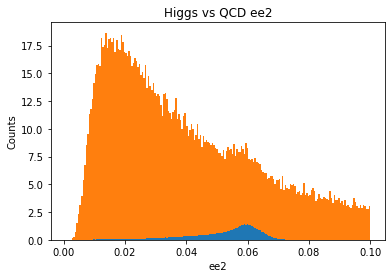

In [386]:
# Make cuts and get significance for ee2

# For first cut, cut between ee2 of 0 and 0.1

heights = make_cuts('ee2', 0, 0.1, True)
calc_significance(heights)

Significance:  1.8441255836639763


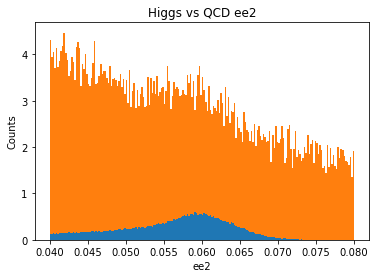

In [387]:
# Second cut ee2
heights = make_cuts('ee2', 0.04, 0.08, True)
calc_significance(heights)

Significance:  2.0682759424702404


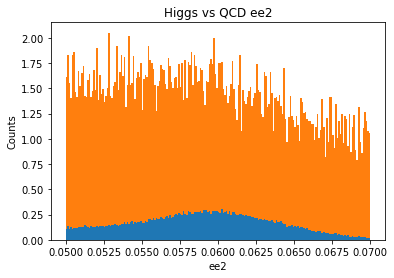

In [388]:
# Third cut ee2

heights = make_cuts('ee2', 0.05, 0.07, True)
calc_significance(heights)

In [389]:
# Multiple cuts for ee2

low_vals = [0.0525, 0.0550, 0.575]
up_vals = [0.0675, 0.0650, 0.0625]
for i in range(2):
    heights = make_cuts('ee2', low_vals[i], up_vals[i])
    calc_significance(heights)

Significance:  2.2388628744137433
Significance:  2.207103596581925


From looking at the significances provided by making feature cuts on ee2, it is not as good of a discriminator as the mass is.

Significance:  1.8125803258592799


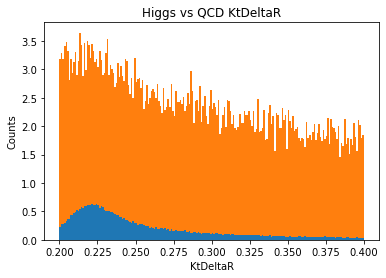

In [390]:
# Make cuts on KtDeltaR

# For first cut, cut between KtDeltaR of 0.2 and 0.4

heights = make_cuts('KtDeltaR', 0.2, 0.4, True)
calc_significance(heights)

In [391]:
upper_bounds = [0.375, 0.350, 0.325, 0.3, 0.25, 0.225]

for i in upper_bounds:
    heights = make_cuts('KtDeltaR', 0.2, i, False)
    calc_significance(heights)

Significance:  1.9824637681967743
Significance:  1.9955707876598507
Significance:  2.089802672409519
Significance:  2.1652463266309194
Significance:  2.1815139983514973
Significance:  1.5579365036158412


After making feature cuts on KtDeltaR, it never reaches significance values as high as the mass parameter, so it is not as good of a discriminator.

Significance:  1.5233817005529862


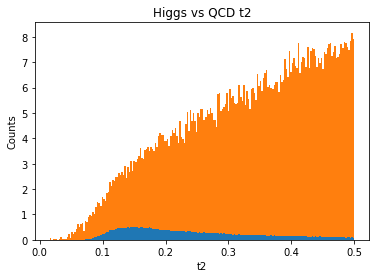

In [392]:
# Make Cuts and Calculate Significance of t2

heights = make_cuts('t2', 0, 0.5, True)
calc_significance(heights)

Significance:  1.5003111999951526


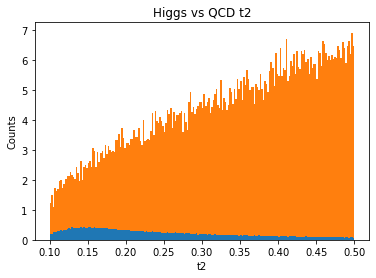

In [393]:
heights = make_cuts('t2', 0.1, 0.5, True)
calc_significance(heights)

In [394]:
upper_bound = [0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15]
for i in upper_bound:
    heights = make_cuts('t2', 0.1, i, False)
    calc_significance(heights)

Significance:  1.610410268457865
Significance:  1.715954176040071
Significance:  1.8104719763732324
Significance:  1.8587906223934527
Significance:  1.9497176457646532
Significance:  1.865215266983132
Significance:  1.52944270773103


Significance:  1.5283132238403265


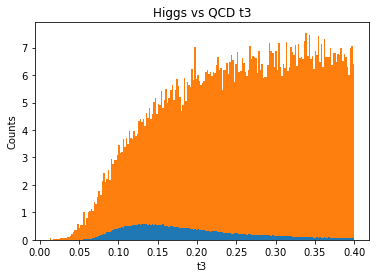

In [395]:
# Make Cuts and calculate significance for t3

heights = make_cuts('t3', 0, 0.4, True)
calc_significance(heights)

Significance:  1.5519633174076999


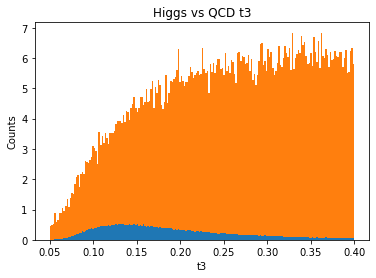

In [396]:
heights = make_cuts('t3', 0.05, 0.4, True)
calc_significance(heights)

In [397]:
upper_bounds = [0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
for i in upper_bounds:
    heights = make_cuts('t3', 0.05, i, False)
    calc_significance(heights)

Significance:  1.6856082669498393
Significance:  1.8187855764313645
Significance:  1.9122882235166567
Significance:  1.9139609846750933
Significance:  1.6505934827252016
Significance:  0.7575069236171769


After making feature cuts on all of the potential candidates for being good discriminators, none of them produced significance greater than the mass parameter. 

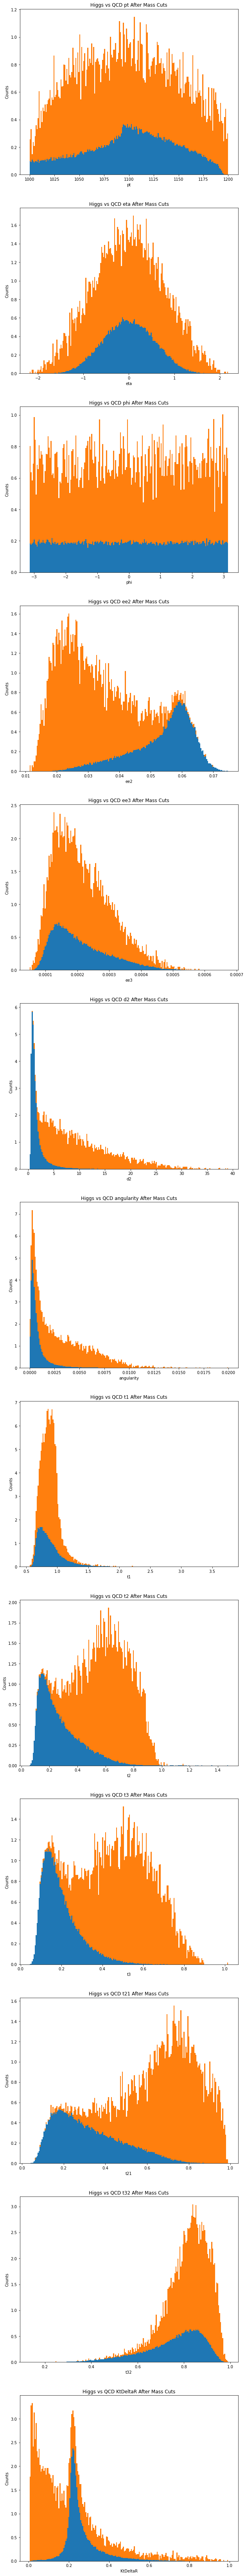

In [399]:
# Problem 3.B


fig, ax = plt.subplots(13, figsize=(10,120))
count = 0

higgs_mass_cut = higgs_dict[higgs_dict['mass'] > 122]
higgs_mass_cut = higgs_mass_cut[higgs_mass_cut['mass'] < 130]

qcd_massCut = qcd_dict[qcd_dict['mass'] > 122]
qcd_massCut = qcd_massCut[qcd_massCut['mass'] < 130 ]
for var in qcd_dict:
    if var != 'mass':
        higgs = higgs_mass_cut[var]
        qcd = qcd_massCut[var]

        data = [higgs, qcd]
        higgs_rescale_factor = 50 / 100000
        qcd_rescale_factor = 2000 / 100000

        higgs_weights = np.repeat(higgs_rescale_factor, len(higgs))
        qcd_weights = np.repeat(qcd_rescale_factor, len(qcd))


        heights, temp1, temp2 = ax[count].hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights])
        ax[count].set_xlabel(var)
        ax[count].set_ylabel('Counts')
        ax[count].set_title(f'Higgs vs QCD {var} After Mass Cuts')
        count += 1

The above plots show the higgs data, and QCD background data for the other parameters, after perofrming the optimal mass cuts. From observing the above plots, the variable that appears to be a great discriminator is 
d2, as it appears possible to remove very little of the higgs events, and remove most of the background, while for other variables, much of thr background can be removed, but at the cost of removing many higgs events. I elected to chose a mass cut from 122 GeV to 130 GeV, which is wider that some of the ones I tested earlier, but doing this will preserve more higgs events in the data.

In [400]:
def make_mass_cuts(var, lower_bound, upper_bound, plot=False):
    higgs = higgs_mass_cut[var]
    qcd = qcd_massCut[var]
    
    qcd_cut = [j for j in qcd if j > lower_bound and j < upper_bound]
    higgs_cut = [j for j in higgs if j > lower_bound and j < upper_bound]

    data = [higgs_cut, qcd_cut]
    higgs_rescale_factor_mass = 50 / 100000
    qcd_rescale_factor_mass = 2000 / 100000

    higgs_weights = np.repeat(higgs_rescale_factor_mass, len(higgs_cut))
    qcd_weights = np.repeat(qcd_rescale_factor_mass, len(qcd_cut))
    
    heights = []
    if plot:
        heights, temp1, temp2 = plt.hist(data, 200, stacked=True, weights=[higgs_weights, qcd_weights])
        plt.xlabel(var)
        plt.ylabel('Counts')
        plt.title(f'Higgs vs QCD {var}')
    else:
        qcd_heights, temp1 = np.histogram(qcd_cut, 200, weights=qcd_weights)
        higgs_heights, temp2 = np.histogram(higgs_cut, 200, weights=higgs_weights)
        heights=[higgs_heights, qcd_heights]
    
    return heights
    
def calc_mass_significance(heights):
    mean_higgs = sum(heights[0])
    mean_qcd = sum(heights[1])
    probability = stats.poisson.sf(mean_qcd, mu=mean_qcd - mean_higgs)
    sigma = stats.norm.isf(probability)
    print('Significance: ', str(sigma))


Significance:  8.413876498269929
Expected Higgs Yield:  33.20199999997443
Expected Total Yield:  40.76199999997432


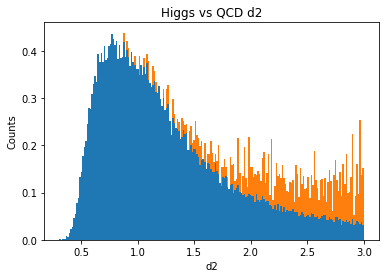

In [404]:
# Make Cuts for D2
heights = make_mass_cuts('d2', 0, 3, True)
calc_mass_significance(heights)
print('Expected Higgs Yield: ', str(sum(heights[0])))
print('Expected Total Yield: ', str(sum(heights[1])))

## Problem 4

Problem 4.

My goal for acheiving sensitivity with the cuts was to acheive at least a 5 sigma sensitivity, while keeping at least 30 higgs events within the signal data. Using the mass cut, and D2 cut, I was able to acheive a sensitivity of 8.413876498269929 sigma, and still had 33 higgs events left in the signal data. Using these cuts will work sufficiently so further cuts will not be necessary. The optimal feature cuts I will be using is mass from 122 GeV to 130 GeV, and D2 from 0 to 3.

# Lab 8

In [405]:
# Lab 8
import pandas as pd
high_lumi = pd.read_hdf('data_highLumi_pt_1000_1200.h5')
low_lumi = pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

## Problem 1

In [406]:
# 8.1

def normalize(qcd_data, higgs_data, var, bins):
    factor = len(high_lumi) / 2050
    higgs_rescale_factor = (50 * factor)  / 100000
    qcd_rescale_factor = (2000 * factor) / 100000

    higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_data))
    qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_data))
    qcd = np.histogram(qcd_data[var], bins= bins, weights=qcd_weights)
    higgs = np.histogram(higgs_data[var], bins = bins, weights=higgs_weights)
    normalized = np.array([qcd[1][:-1], qcd[0]+higgs[0]])
    return normalized

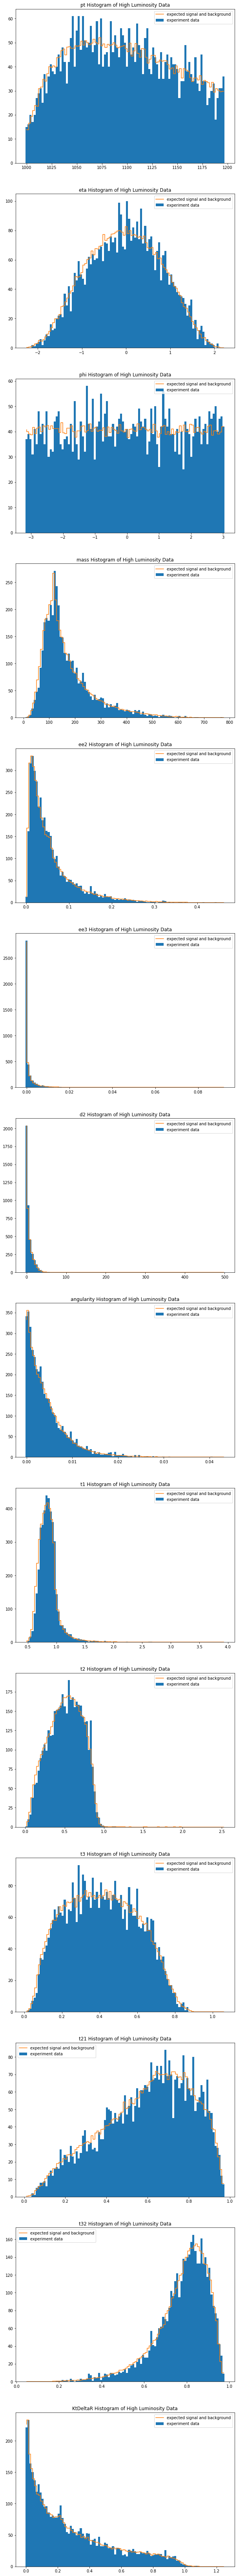

In [407]:
fig, ax = plt.subplots(14, figsize=(10,120))
count = 0

for var in qcd_dict:
    high_lumi_rescale_factor = 1
    high_lumi_weights = np.repeat(high_lumi_rescale_factor, len(high_lumi))
    
    bins = np.arange(qcd_dict[var].min(),qcd_dict[var].max(),(qcd_dict[var].max()-qcd_dict[var].min())/100)
    
    ax[count].hist(high_lumi[var], bins=bins, weights=high_lumi_weights, align='left', label='experiment data')
    ax[count].step(normalize(qcd_dict, higgs_dict, var, bins)[0], normalize(qcd_dict, higgs_dict, var, bins)[1], label='expected signal and background')
    ax[count].legend()
    ax[count].set_title(f'{var} Histogram of High Luminosity Data')
    count += 1
    

    

The above plots compare the expected data, and the observed high luminosity data. Because the size of the observed data was much smaller than the expected data, I needed to renormalize the expected data so that it would contain the same number of higgs events as the observed data when summed. To do this I multiplied (number of observed data points) / (2500) to the weight that I calculated previously for the Higgs and QCD data. The value 2050 is from the total number of counts of the background and higgs signal data. After making plots for each variable without making cuts, the expected data closely follows the observed data after it is normalized.

In [408]:

high_lumi_mass_cut = high_lumi[high_lumi['mass'] > 122]
high_lumi_mass_cut = high_lumi_mass_cut[high_lumi_mass_cut['mass'] < 130]
high_lumi_final_cut = high_lumi_mass_cut[high_lumi_mass_cut['d2'] > 0]
high_lumi_final_cut = high_lumi_final_cut[high_lumi_final_cut['d2'] < 3]

higgs_mass_cut = higgs_dict[higgs_dict['mass'] > 122]
higgs_mass_cut = higgs_mass_cut[higgs_mass_cut['mass'] < 130]
higgs_final_cut = higgs_mass_cut[higgs_mass_cut['d2'] > 0]
higgs_final_cut = higgs_final_cut[higgs_final_cut['d2'] < 3]

qcd_mass_cut = qcd_dict[qcd_dict['mass'] > 122]
qcd_mass_cut = qcd_mass_cut[qcd_mass_cut['mass'] < 130 ]
qcd_final_cut = qcd_mass_cut[qcd_mass_cut['d2'] > 0]
qcd_final_cut = qcd_final_cut[qcd_final_cut['d2'] < 3]

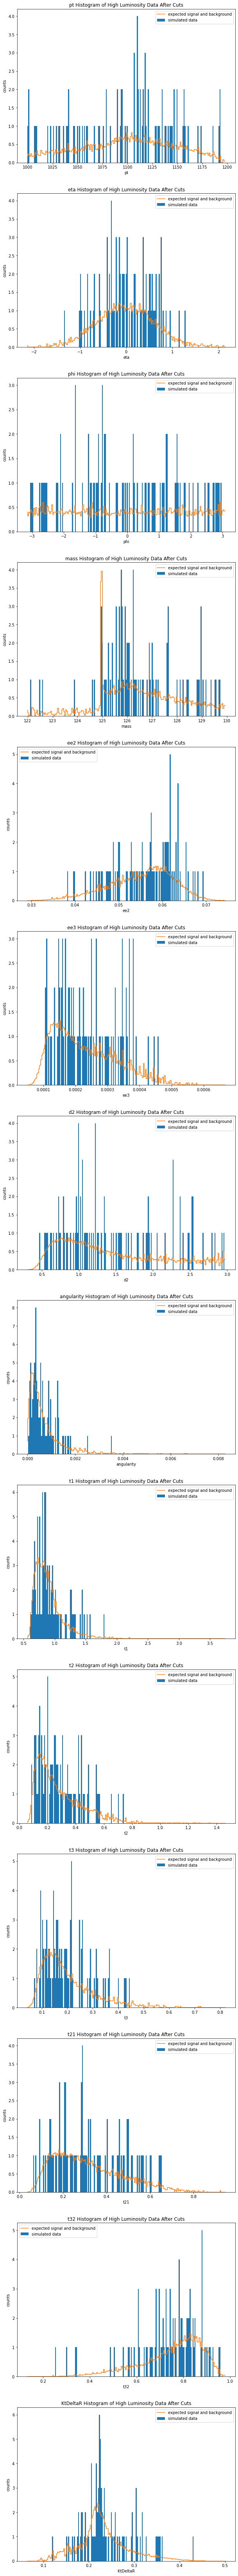

In [409]:
fig, ax = plt.subplots(14, figsize=(10,120))
count = 0

for var in qcd_dict:
    high_lumi_rescale_factor = 1
    high_lumi_weights = np.repeat(high_lumi_rescale_factor, len(high_lumi_final_cut))
    bins = np.arange(pd.concat([qcd_final_cut[var], higgs_final_cut[var]]).min(), pd.concat([qcd_final_cut[var], higgs_final_cut[var]]).max(), (pd.concat([qcd_final_cut[var], higgs_final_cut[var]]).max() - pd.concat([qcd_final_cut[var], higgs_final_cut[var]]).min())/200) 
    ax[count].hist(high_lumi_final_cut[var], bins=bins, weights=high_lumi_weights, align='left', label='simulated data')
    ax[count].step(normalize(qcd_final_cut, higgs_final_cut, var, bins)[0], normalize(qcd_final_cut, higgs_final_cut, var, bins)[1], label='expected signal and background')
    ax[count].legend()
    ax[count].set_title(f'{var} Histogram of High Luminosity Data After Cuts')
    ax[count].set_xlabel(var)
    ax[count].set_ylabel('counts')
    count += 1

The above plots compare the observed high luminosity data, and expected data after the optimal feature cuts that I defined above have been made to both. The observed data is more sparse than the expected data, which is likely due to the total number of data points being far less.

In [410]:
high_lumi_rescale_factor = 1
high_lumi_weights = np.repeat(high_lumi_rescale_factor, len(high_lumi_final_cut))

factor = len(high_lumi) / 2050
qcd_rescale_factor = (2000 * factor) / 100000
higgs_rescale_factor = (50 * factor) / 100000

qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_final_cut))
higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_final_cut))

qcd_hist = np.histogram(qcd_final_cut['mass'], bins=np.arange(pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min(), pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max(), (pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max() - pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min())/200), 
                     weights=qcd_weights)

higgs_hist = np.histogram(higgs_final_cut['mass'], bins=np.arange(pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min(), pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max(), (pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max() - pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min())/200), 
                     weights=higgs_weights)

high_lumi_hist = np.histogram(high_lumi_final_cut['mass'], bins=np.arange(pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min(), pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max(), (pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max() - pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min())/200), 
           weights=high_lumi_weights)


In [411]:
significance_data = stats.poisson.sf(high_lumi_hist[0].sum(), mu = qcd_hist[0].sum())
sigma_data = stats.norm.isf(significance_data)
print('Observed Significance: ', str(sigma_data))

Observed Significance:  13.067203354986338


To calculate the significance, I use a poisson distribution with the number of counts from the expected QCD background to be the mean, and the value that I am searching for is the number of counts in the observed data. I calculated a value of 13.067203354986338 for the high luminosity data, which is greater than the value calculated earlier in the expected set which was 8.413876498269929. 

In [412]:
def normalize_low(qcd_data, higgs_data, var, bins):
    factor = len(low_lumi) / 2050
    higgs_rescale_factor = (50 * factor)  / 100000
    qcd_rescale_factor = (2000 * factor) / 100000

    higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_data))
    qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_data))
    qcd = np.histogram(qcd_data[var], bins= bins, weights=qcd_weights)
    higgs = np.histogram(higgs_data[var], bins = bins, weights=higgs_weights)
    normalized = np.array([qcd[1][:-1], qcd[0]+higgs[0]])
    return normalized

## Problem 2

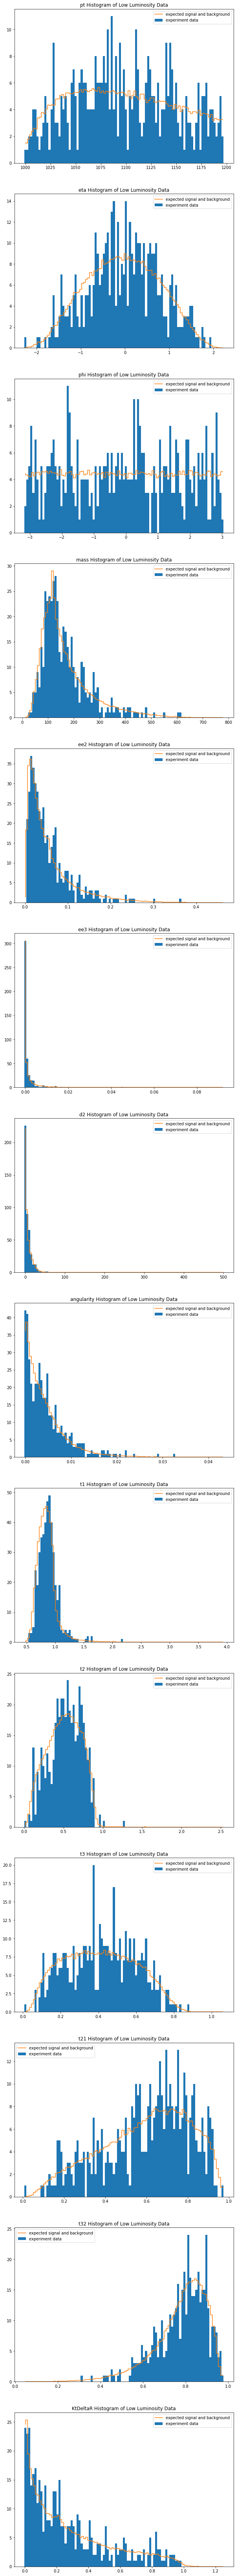

In [413]:
# Problem 2:

fig, ax = plt.subplots(14, figsize=(10,120))
count = 0

for var in qcd_dict:
    low_lumi_rescale_factor = 1
    low_lumi_weights = np.repeat(low_lumi_rescale_factor, len(low_lumi))
    
    bins = np.arange(qcd_dict[var].min(),qcd_dict[var].max(),(qcd_dict[var].max()-qcd_dict[var].min())/100)
    
    ax[count].hist(low_lumi[var], bins=bins, weights=low_lumi_weights, align='left', label='experiment data')
    ax[count].step(normalize_low(qcd_dict, higgs_dict, var, bins)[0], normalize_low(qcd_dict, higgs_dict, var, bins)[1], label='expected signal and background')
    ax[count].legend()
    ax[count].set_title(f'{var} Histogram of Low Luminosity Data')
    count += 1

The above plots compare the expected signal and background to the observed low luminosity data. Like with the high luminosity data, I normalized the expected data so that the number of higgs events would line up with the number that would appear in the observed data. This time around I multiplied the original weighting for the expected data by a factor of (number of data points in low luminosity data) / (2500). Again like the high luminosity data, before any cuts and after normalization the expected and observed data match up quite well,

In [414]:
low_lumi_mass_cut = low_lumi[low_lumi['mass'] > 122]
low_lumi_mass_cut = low_lumi_mass_cut[low_lumi_mass_cut['mass'] < 130]
low_lumi_final_cut = low_lumi_mass_cut[low_lumi_mass_cut['d2'] > 0]
low_lumi_final_cut = low_lumi_final_cut[low_lumi_final_cut['d2'] < 3]

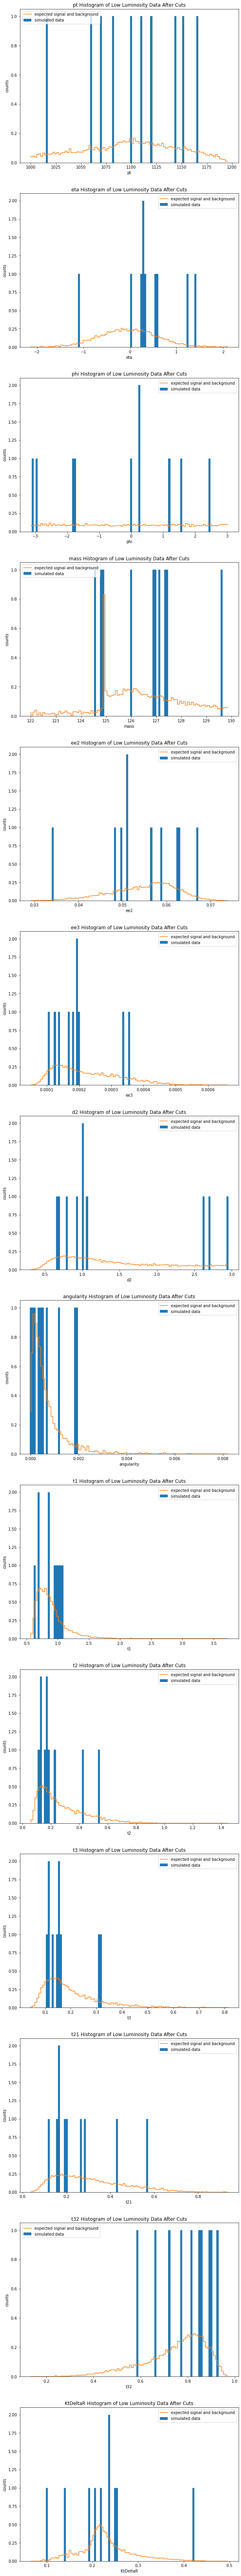

In [415]:
fig, ax = plt.subplots(14, figsize=(10,120))
count = 0

for var in qcd_dict:
    low_lumi_rescale_factor = 1
    low_lumi_weights = np.repeat(low_lumi_rescale_factor, len(low_lumi_final_cut))
    bins = np.arange(pd.concat([qcd_final_cut[var], higgs_final_cut[var]]).min(), pd.concat([qcd_final_cut[var], higgs_final_cut[var]]).max(), (pd.concat([qcd_final_cut[var], higgs_final_cut[var]]).max() - pd.concat([qcd_final_cut[var], higgs_final_cut[var]]).min())/100) 
    ax[count].hist(low_lumi_final_cut[var], bins=bins, weights=low_lumi_weights, align='left', label='simulated data')
    ax[count].step(normalize_low(qcd_final_cut, higgs_final_cut, var, bins)[0], normalize_low(qcd_final_cut, higgs_final_cut, var, bins)[1], label='expected signal and background')
    ax[count].legend()
    ax[count].set_title(f'{var} Histogram of Low Luminosity Data After Cuts')
    ax[count].set_xlabel(var)
    ax[count].set_ylabel('counts')
    count += 1

The above plots compare the expected data with the observed low luminosity after the optimal feature cuts have been made. The observed data is very sparse, and does not appear tp follow the distribution of the expected data much at all after the cuts have been made.

In [416]:
low_lumi_rescale_factor = 1
low_lumi_weights = np.repeat(low_lumi_rescale_factor, len(low_lumi_final_cut))

factor = len(low_lumi) / 2050
qcd_rescale_factor = (2000 * factor) / 100000
higgs_rescale_factor = (50 * factor) / 100000

qcd_weights = np.repeat(qcd_rescale_factor, len(qcd_final_cut))
higgs_weights = np.repeat(higgs_rescale_factor, len(higgs_final_cut))

qcd_hist = np.histogram(qcd_final_cut['mass'], bins=np.arange(pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min(), pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max(), (pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max() - pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min())/200), 
                        weights=qcd_weights)

higgs_hist = np.histogram(higgs_final_cut['mass'], bins=np.arange(pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min(), pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max(), (pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max() - pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min())/200), 
                     weights=higgs_weights)

low_lumi_hist = np.histogram(low_lumi_final_cut['mass'], bins=np.arange(pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min(), pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max(), (pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).max() - pd.concat([qcd_final_cut['mass'], higgs_final_cut['mass']]).min())/200), 
           weights=low_lumi_weights)
new_hist = low_lumi_hist[0]-qcd_hist[0]

In [417]:
significance_data = stats.poisson.sf(low_lumi_hist[0].sum(), mu = qcd_hist[0].sum())
sigma_data = stats.norm.isf(significance_data)
print('Significance: ', str(sigma_data))

Significance:  4.748661690574019


To calculate the significance, I used the same technique as with the high luminosity data. Its significance is much lower than the observed high luminosity data, and the significance of the expected data.

# Problem 3

In [418]:
# Problem 3
comparison = []
for var in qcd_dict:
    expected_upper_limit = np.quantile(higgs_final_cut[var], 0.95)
    print(f'Expected 95% confidence level upper limit for {var}: ', str(expected_upper_limit))

    observed_upper_limit = np.quantile(low_lumi_final_cut[var], 0.95)
    print(f'Observed 95% confidence level upper limit for {var}: ', str(observed_upper_limit))
    compared = f'{var} expected confidence level - observed confidence level: ' + str(expected_upper_limit - observed_upper_limit)
    comparison.append(compared)

Expected 95% confidence level upper limit for pt:  1173.5462914378952
Observed 95% confidence level upper limit for pt:  1160.466800067128
Expected 95% confidence level upper limit for eta:  0.9122839414167622
Observed 95% confidence level upper limit for eta:  1.3531227914730994
Expected 95% confidence level upper limit for phi:  2.829809825949009
Observed 95% confidence level upper limit for phi:  2.0834614213123666
Expected 95% confidence level upper limit for mass:  129.3275121053616
Observed 95% confidence level upper limit for mass:  128.6907361362659
Expected 95% confidence level upper limit for ee2:  0.066246442369511
Observed 95% confidence level upper limit for ee2:  0.06526923866628301
Expected 95% confidence level upper limit for ee3:  0.000388092925143651
Observed 95% confidence level upper limit for ee3:  0.0003519799688856561
Expected 95% confidence level upper limit for d2:  2.48333856832458
Observed 95% confidence level upper limit for d2:  2.847522901986717
Expected 9

In [419]:
for i in comparison:
    print(i)

pt expected confidence level - observed confidence level: 13.0794913707673
eta expected confidence level - observed confidence level: -0.4408388500563373
phi expected confidence level - observed confidence level: 0.7463484046366426
mass expected confidence level - observed confidence level: 0.6367759690956802
ee2 expected confidence level - observed confidence level: 0.0009772037032279857
ee3 expected confidence level - observed confidence level: 3.611295625799492e-05
d2 expected confidence level - observed confidence level: -0.36418433366213687
angularity expected confidence level - observed confidence level: -0.0004631740508495416
t1 expected confidence level - observed confidence level: 0.25809834490973427
t2 expected confidence level - observed confidence level: 0.04696454838522629
t3 expected confidence level - observed confidence level: 0.016580519220180223
t21 expected confidence level - observed confidence level: 0.06000409209052282
t32 expected confidence level - observed conf

To calculate the upper limit of the 95% confidence intervals, I used the np.quantile() function. For the observed data, I used the data in the low luminosity dataset, and for expected, I used the higgs data to better encapsulate the limit for higgs events. When comparing the two, there is some descrepancy, especially in variables like pt where there is a larger range of values in the data. All in all the difference in the confidence intervals is never extremely far apart, so I beleive that it is safe to say that the two data sets agree with one another, despite the significance of a higgs event within the low luminosity data being lower than in the expected data.